# Salary Predictions Based on Job Descriptions


**Author:** Ammar Sidhu

**email:** **ammarsidhu@outlook.com**

# Part 1 - Defining the Problem

The goal of this project is to accurately predict salaries given known salaries of professions based on job descriptions so that recruiters can hire suitable candidates for job roles. With the help of machine learning regression algorithms used in this notebook, the recruitment company will be able to offer candidates appropriate and compettitive salaries while staying within budget. 

Statistical techniques via data preprocessing and regression algorithms will be employed to develop a model that predicts, with high accuracy, employee salary given the following information about them:
- Years of Experience
- Job Type
- College Degree
- College Major
- Industry
- Miles from Metropolis

The raw dataset for this problem is split into 3 smaller datasets as CSVs. There is 1 training dataset containing the description of the employee as stated above, and their corresponding salary. From this training dataset, 20% was split into a seperate test dataset with corresponding employee salary in order to compute the accuracy and error of the models. In order to test the model, predictions will be made on the third dataset, the testing dataset, which comprises of job descriptions for an employee with no corresponding salaries. This testing dataset will act as a substitute to real-world data so that the model can be used for salary prediction.

**Data Dictionary - The features (job descriptions for employees) used to predict the target variable (employee salary):**
* **1. jobType** - position held (CEO, CFO, CTO, Vice President, Manager, Janitor, and senior or junior position)

* **2. degree** - type of degree (Doctoral, Masters, Bachelors, High School, or None)

* **3. major** - type of major (Biology, Business, Chemistry, Computer Science, Engineering, Literature, Math, Physics, or None)

* **4. industry** - type of industry (Auto, Education, Finance, Health, Oil, Service, or Web)

* **5. yearsExperience** - experience as number of years

* **6. milesFromMetropolis** - distance, in miles, from a metropolis


# Part 2 - DISCOVER

## 1. Preparing the Tools

### 1.1 Required Libraries 

In [1]:
# Importing EDA and Plotting Libraries
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
# plots should appear in the notebook
%matplotlib inline 
import seaborn as sns

# Visualization themes & styles
plt.style.use('ggplot')
sns.set_theme(style = "darkgrid", palette = "pastel")

# Regression Models for Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Regression Model Tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 1.2 Relevant functions 

In [2]:
# Function to Load Data as Pandas Dataframe
def read_file(file):
    """
    Read CSV file as file path.
    """
    return pd.read_csv(file)

# Function to Clean Data from Duplicate JobIDs, and Invalid Data (e.g. salaries <= 0)
def clean_data(raw_data):
    """
    Clean dataframe by removing duplicates (rows with the same jobID) 
    and rows where salaries are less than $0 (not possible).
    """
    filtered_data = raw_data.drop_duplicates(subset = 'jobId')
    filtered_data = raw_data[raw_data.salary > 0]
    return filtered_data

## 2. Load the data

In [3]:
# Read training data containing features
train_feat_df = read_file("train_features.csv")

# Inspect tranining data
train_feat_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
# Read training data containing target (salary)
train_target_df = read_file("train_salaries.csv")

# Inspect target data
train_target_df.head(5)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
# Read testing data containing features but no target (no salary)
test_feat_df = read_file("test_features.csv")

# Inspect testing data
test_feat_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


## 3. Exploratory Data Analysis (EDA) 

EDA Template that will be followed for this problem:
1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and what are the different types of data present?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and are they something to be concerned about?
5. How can you add, change or remove features to get more out of your data?

### 3.1 Data Description

In [6]:
# Top 10 rows of features dataframe
train_feat_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [7]:
# Shape of features dataframe
print(train_feat_df.shape)

(1000000, 8)


In [8]:
# Top 10 rows of target (salary) dataframe
train_target_df.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [9]:
# Shape of target (salary) dataframe
print(train_target_df.shape)

(1000000, 2)


In [10]:
# Top 10 rows of testing dataframe
test_feat_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [11]:
# Shape of testing dataframe
print(test_feat_df.shape)

(1000000, 8)


The data in the **train_target_df** dataframe only contains the Job ID, and the salary of employee. Whereas, the data in the **train_feat_df** dataframe contains the description of the employee. Therefore, we will merge these 2 dataframes into a single dataframe on the `jobId` column to obtain the training dataset. The **test_feat_df** will be used later for predictions to test our model, hence it only contains employee job descriptions but not their corresponding salaries.

In [12]:
# Merging training data with features to training data with salary
df_train = pd.merge(train_feat_df, train_target_df, on = 'jobId')

# Inspect merged training data
df_train.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


In [13]:
# Shape of training dataframe
print(df_train.shape)

(1000000, 9)


The training dataset contains 1000000 observations/employee jobs, and each observation/job is accompanied with 6 descriptions/attributes about their job as well as their corresponding salary. 

### 3.2 Descriptive Statistics

In [14]:
# Data types
df_train.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

After inspecting unique values, it is safe to conclude that we do not have any repeating employees in our data because the JobId column contains 1000000 unique values, which is the same as the number of observations in our training data.

In [15]:
# Seperating the columns into categorical and continuous features
categorical_cols = ["jobType", "degree", "major", "industry"]
continuous_cols = ["yearsExperience", "milesFromMetropolis"]
target_col = ["salary"]

In [16]:
# Summary Statistics for features
df_train[continuous_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yearsExperience,1000000.0,11.992386,7.212391,0.0,6.0,12.0,18.0,24.0
milesFromMetropolis,1000000.0,49.529260,28.877733,0.0,25.0,50.0,75.0,99.0


In [17]:
# Summary Statistics for target (salary)
df_train[target_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary,1000000.0,116.061818,38.717936,0.0,88.0,114.0,141.0,301.0


### 3.3 Handling Missing Values & Duplicates

In [18]:
# Number of missing values
df_train.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

There are **no missing values** in the training data. 

In [19]:
# Number of unique values in each column for the features data
dict = {}
for i in list(train_feat_df.columns):
    dict[i] = train_feat_df[i].value_counts().shape[0]

pd.DataFrame(dict, index = ["# of Unique Values:"]).transpose()

,# of Unique Values:
jobId,1000000
companyId,63
jobType,8
degree,5
major,9
industry,7
yearsExperience,25
milesFromMetropolis,100


After inspecting unique values, it is safe to conclude that we do not have any repeating employees in our data because the JobId column contains 1000000 unique values, which is the same as the number of observations in our training data. 

In [20]:
# Number of duplicates
duplicates_number = df_train.duplicated().sum()
print("Number of duplicated rows is: ", duplicates_number)

Number of duplicated rows is:  0


There are **no duplicate values** in the training data!

### 3.4 Data Cleaning

In [21]:
# Check for salaries that are less than or equal to $0 
na_salary = df_train[df_train['salary'] <= 0]
na_salary

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


We have **5** employees with salaries that are listed as **$0** in the training data, and these positions are not voluntary. These employees work in jobs that involve professional industries. Therefore, these employees are not useful in the analysis as they do not have the correct salary listed, so these employees will be removed from the training data.

In [22]:
# Clean data by removing duplicates and invalid salaries (salary <= $0)
cleaned_df_train = clean_data(df_train)

# Inspect cleaned dataframe
cleaned_df_train.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


In [23]:
# Descriptive statistics of continuous features and target (salary)
cleaned_df_train.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


The descriptive statistics for the 2 the continuous features, and the target (salary) appear to reasonable with realistic means and standard deviations.

### 3.5 Exploring Target Variable - Salary

#### Assessing Normality of Target Variable (salary)

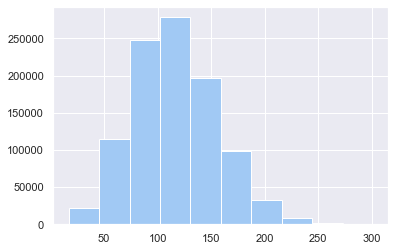

In [24]:
# Histogram of salary 
plt.hist(x = cleaned_df_train['salary']);

Upon visual inspection, the distribution of the salary variable appears to be **normally distributed**. 

In [25]:
# Computing Skewness and Kurtosis of salary variable
print("The Skewness of the target variable: " + str(cleaned_df_train['salary'].skew()))
print("The kurtosis of the target variable: " + str(cleaned_df_train['salary'].kurt()))

The Skewness of the target variable: 0.34652727907668734
The kurtosis of the target variable: -0.025750772283374967


Since the skewness is less than 0.5, the distribution of the salary is very **symmetric**. Additionally, the low kurtosis value indicates that the data does **not have many outliers**, but we will check for them anyways.

#### Inspect Outliers within the Target Variable (salary)

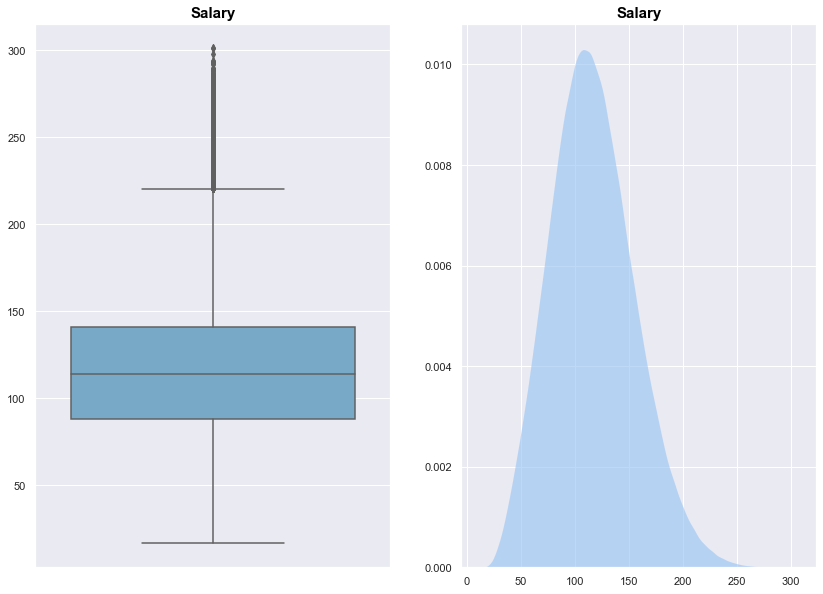

In [26]:
# Bar plots for the categorical features
fig, (ax1, ax2) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (14, 10))

# Boxplot 
sns.boxplot(ax = ax1, y = cleaned_df_train['salary'], palette = 'Blues')
ax1.set_title('Salary', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("")
ax1.set_ylabel("");

# Kernel Density Plot
sns.kdeplot(ax = ax2, data = cleaned_df_train, x = 'salary', fill = True, alpha = 0.7, linewidth = 0)
ax2.set_title('Salary', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax2.set_xlabel("")
ax2.set_ylabel("");

From the box and kernel density plots, it appears there are **outliers** past the upper bounds of the target variable. We will inspect these to see if they make sense or if should they be removed.

In [27]:
# Using IQR to inspect outliers
salary_stats = cleaned_df_train['salary'].describe()
IQR = salary_stats['75%'] - salary_stats['25%']
upper_bound = salary_stats['75%'] + 1.5 * IQR
lower_bound = salary_stats['25%'] - 1.5 * IQR
print("The upper and lower bounds for the targer are: ", (upper_bound, lower_bound))

The upper and lower bounds for the targer are:  (220.5, 8.5)


In [28]:
# Examine the outliers below the lower bound of salaries
cleaned_df_train[cleaned_df_train['salary'] < lower_bound]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


There are **no** outliers below the lower bound in the training dataset. Initially, there were employees with salaries that were listed as $0, and they were removed earlier. 

There appear to be quite a few outliers passed the upper bound, but many of those employees might have more advanced roles in their respective companies, such as CEOs, so we will inspect the salaries passed the upper bound based on position.

In [29]:
# Examine the outliers above the upper bound of salaries based on job type
cleaned_df_train.loc[cleaned_df_train['salary'] > upper_bound, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

An overwhelming majority of salaries that exceed the upper bound are being earned by employees who retain advanced positions. Consequently, their salaries being high make sense and should not be removed from the dataset. However, we will have to understand why the junior positions are earning so much as they lack experience.

In [30]:
# Examine the outliers for junior positions who earn salaries above the upper bound
cleaned_df_train[(cleaned_df_train['salary'] > upper_bound) & (cleaned_df_train['jobType'] == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


The junior positions who earn above the upper bound are employees who have obtained more advanced degrees and work predominately in the oil, finance, and tech industry. Salaries, on average, are much higher in these industries than others. Therefore, these junior positions **are not outliers** that need to be removed. 

### 3.6 Data Visualizations

##### Univariate Data Visualizations

**Bar Plots for Categorical Features**

                                             Bar Graphs for Categorical Features:                                            
                                               _______________________________                                               


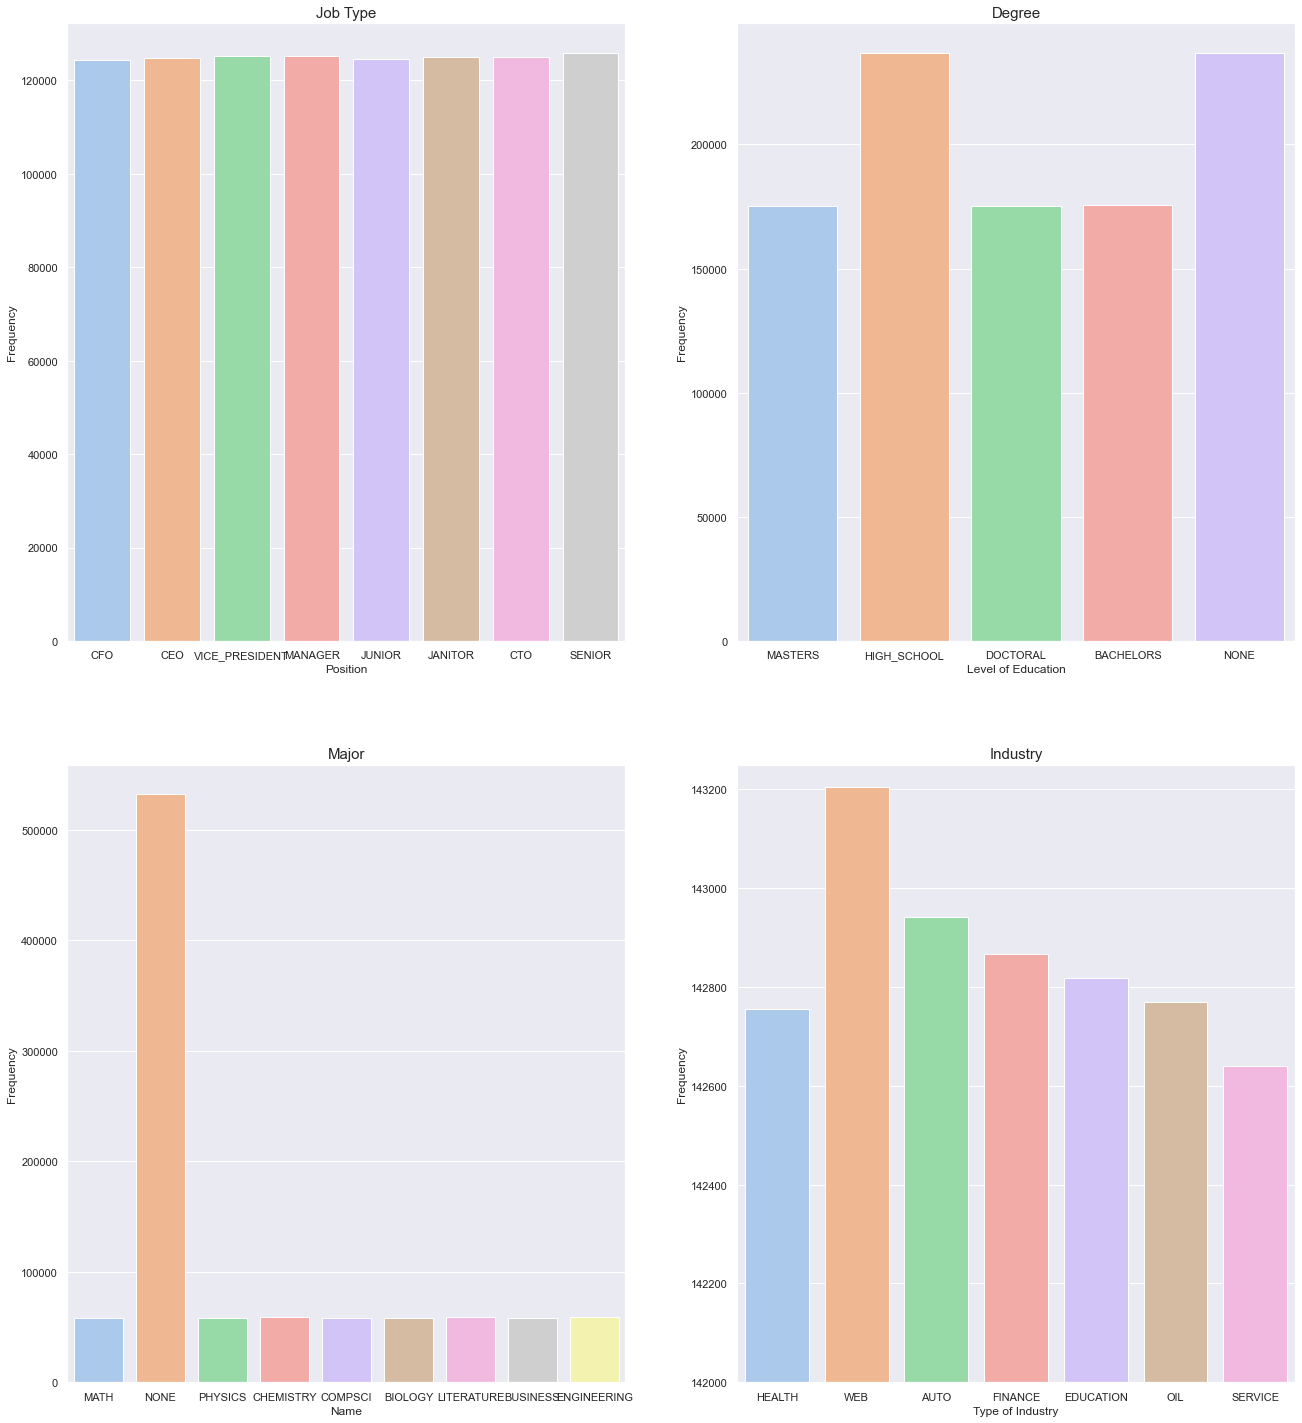

In [31]:
# Title for all bar graphs
title_all_graphs = "Bar Graphs for Categorical Features:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Bar plots for the categorical features
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows = 2,
                                             ncols = 2,
                                             figsize = (22, 25))

# job type (bar plot)
sns.countplot(ax = ax0, data = cleaned_df_train, x = 'jobType')
ax0.set_title("Job Type", fontsize = 15)
ax0.set_xlabel("Position")
ax0.set_ylabel("Frequency")

# degree (bar plot)
sns.countplot(ax = ax1, data = cleaned_df_train, x = 'degree')
ax1.set_title("Degree", fontsize = 15)
ax1.set_xlabel("Level of Education")
ax1.set_ylabel("Frequency")

# major (bar plot)
sns.countplot(ax = ax2, data = cleaned_df_train, x = 'major')
ax2.set_title("Major", fontsize = 15)
ax2.set_xlabel("Name")
ax2.set_ylabel("Frequency")

# industry (bar plot)
sns.countplot(ax = ax3, data = cleaned_df_train, x = 'industry')
ax3.set_title("Industry", fontsize = 15)
ax3.set_xlabel("Type of Industry")
ax3.set_ylabel("Frequency")
ax3.set_ylim(142000, 143250);

**Box Plots & Density Plots for Continuous Features**

                                 Box & Density Plots for Continuous Features:                                 
                                       _______________________________                                        


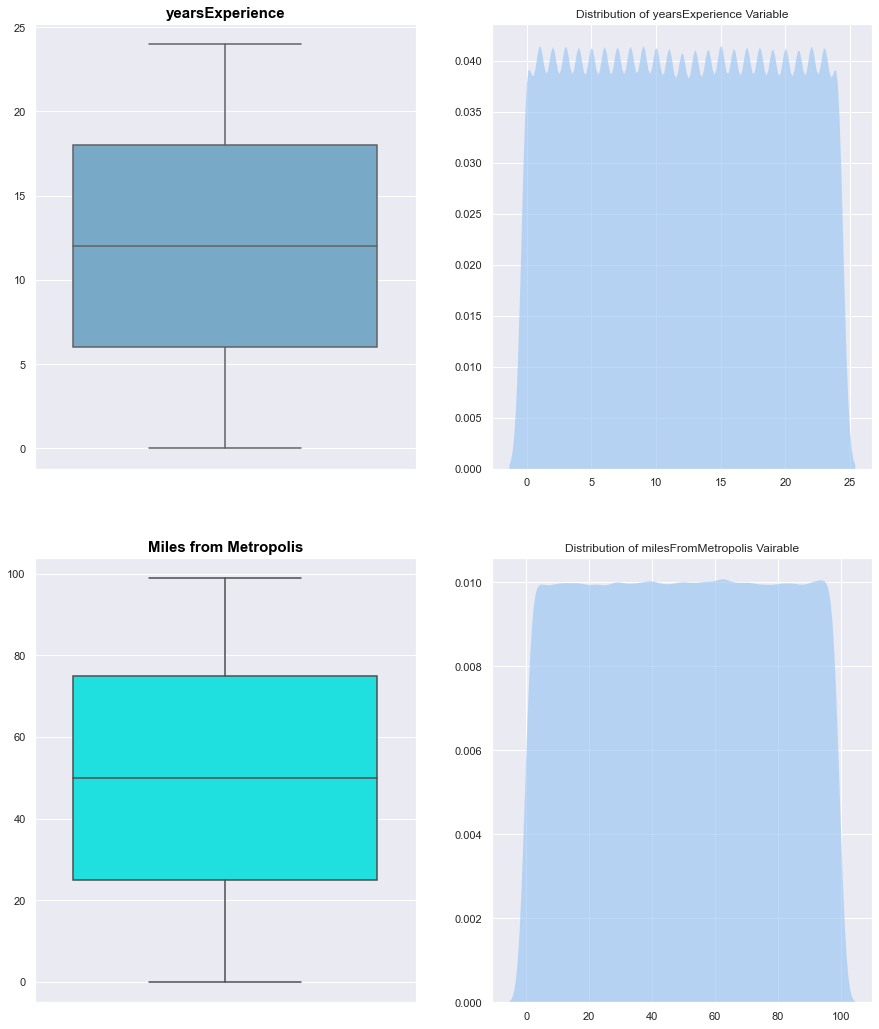

In [32]:
# Title for all box plots
title_all_graphs = "Box & Density Plots for Continuous Features:"
centered_title = title_all_graphs.center(110)
underline = "_______________________________"
centered_underline = underline.center(110)
print(centered_title)
print(centered_underline)

# Bar plots for the continuous features
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows = 2,
                                ncols = 2,
                                figsize = (15, 18))

# yearsExperience (boxplot)
sns.boxplot(ax = ax0, y = cleaned_df_train['yearsExperience'], palette = 'Blues')
ax0.set_title('yearsExperience', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax0.set_xlabel("")
ax0.set_ylabel("")

# yearsExperience (density Plot)
sns.kdeplot(ax = ax1, data = cleaned_df_train, x = 'yearsExperience', fill = True, alpha = 0.7, linewidth = 0)
ax1.set_title("Distribution of yearsExperience Variable")
ax1.set_xlabel("")
ax1.set_ylabel("")

# milesFromMetropolis (box plot)
sns.boxplot(ax = ax2, y = cleaned_df_train['milesFromMetropolis'], color = 'cyan')
ax2.set_title('Miles from Metropolis', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax2.set_xlabel("")
ax2.set_ylabel("")

# milesFromMetropolis (density plot)
sns.kdeplot(ax = ax3, data = cleaned_df_train, x = 'milesFromMetropolis', fill = True, alpha = 0.7, linewidth = 0)
ax3.set_title("Distribution of milesFromMetropolis Vairable")
ax3.set_xlabel("")
ax3.set_ylabel("");

##### Bivariate Data Visualizations

**Scatter Plots for Continuous Features**

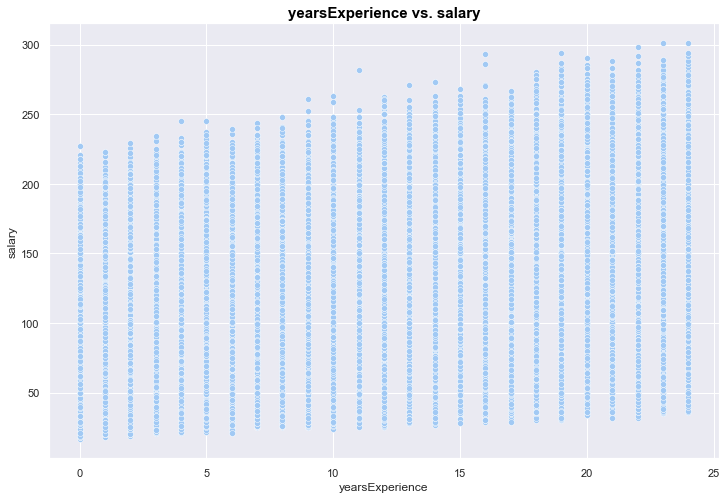

In [33]:
# yearsExperience vs. salary (scatter plot)
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(data = cleaned_df_train, x = 'yearsExperience', y = 'salary')
ax.set_title('yearsExperience vs. salary', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax.set_xlabel("yearsExperience")
ax.set_ylabel("salary");

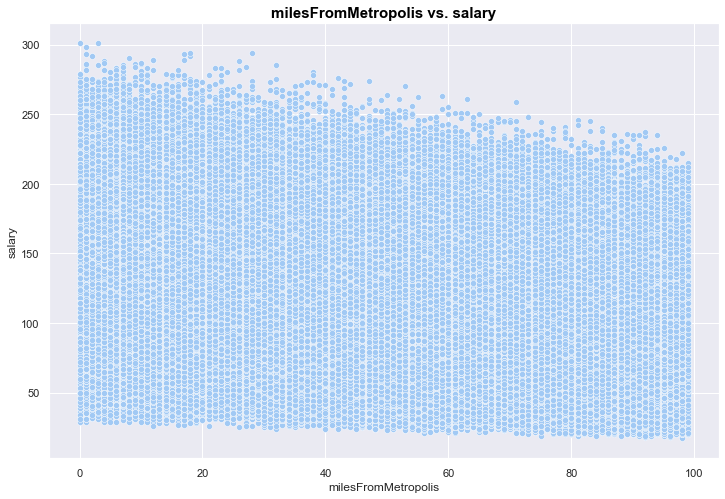

In [34]:
# yearsExperience vs. salary (scatter plot)
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(data = cleaned_df_train, x = 'milesFromMetropolis', y = 'salary')
ax.set_title('milesFromMetropolis vs. salary', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax.set_xlabel("milesFromMetropolis")
ax.set_ylabel("salary");

**Violin Plots for Categorical Features**

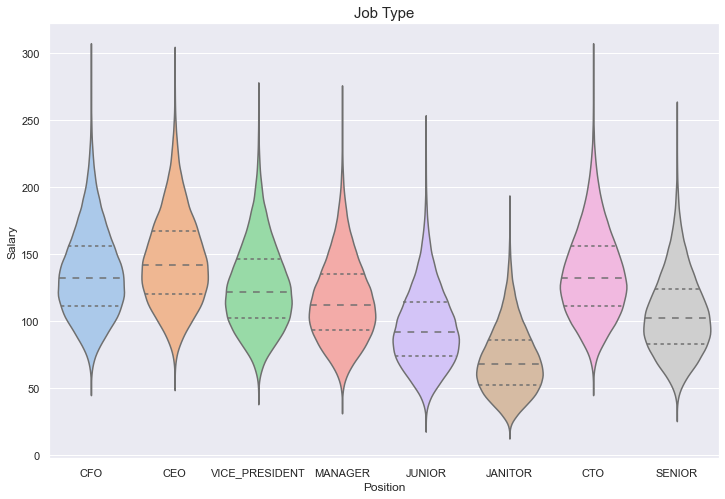

In [35]:
# job type (violin plot)
fig, ax = plt.subplots(figsize = (12, 8))
sns.violinplot(x = cleaned_df_train['jobType'], y = cleaned_df_train['salary'], data = cleaned_df_train, 
               scale = 'count', inner = 'quartile')
ax.set_title("Job Type", fontsize = 15)
ax.set_xlabel("Position")
ax.set_ylabel("Salary");

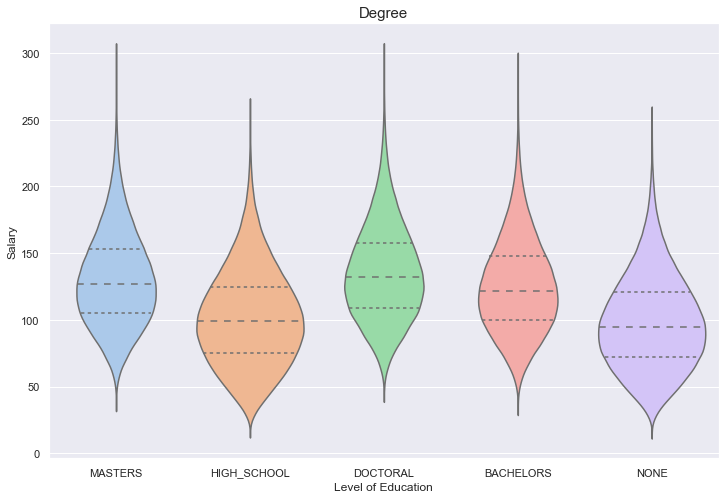

In [36]:
# degree (violin plot)
fig, ax = plt.subplots(figsize = (12, 8))
sns.violinplot(x = cleaned_df_train['degree'], y = cleaned_df_train['salary'], data = cleaned_df_train, 
               scale = 'count', inner = 'quartile')
ax.set_title("Degree", fontsize = 15)
ax.set_xlabel("Level of Education")
ax.set_ylabel("Salary");

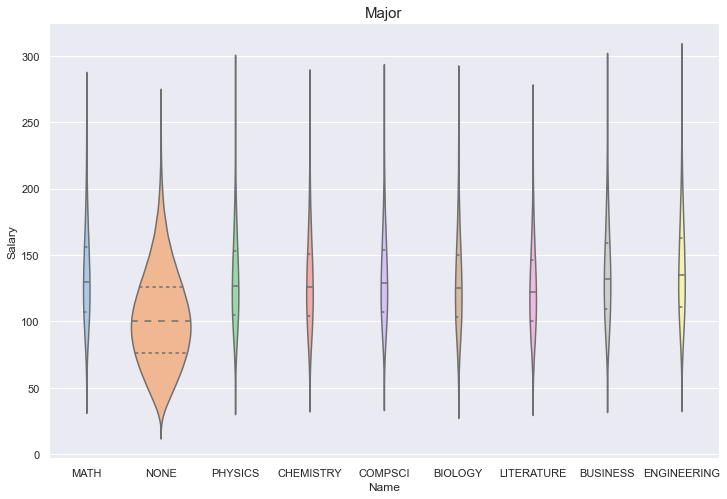

In [37]:
# major (violin plot)
fig, ax = plt.subplots(figsize = (12, 8))
sns.violinplot(x = cleaned_df_train['major'], y = cleaned_df_train['salary'], data = cleaned_df_train, 
               scale = 'count', inner = 'quartile')
ax.set_title("Major", fontsize = 15)
ax.set_xlabel("Name")
ax.set_ylabel("Salary");

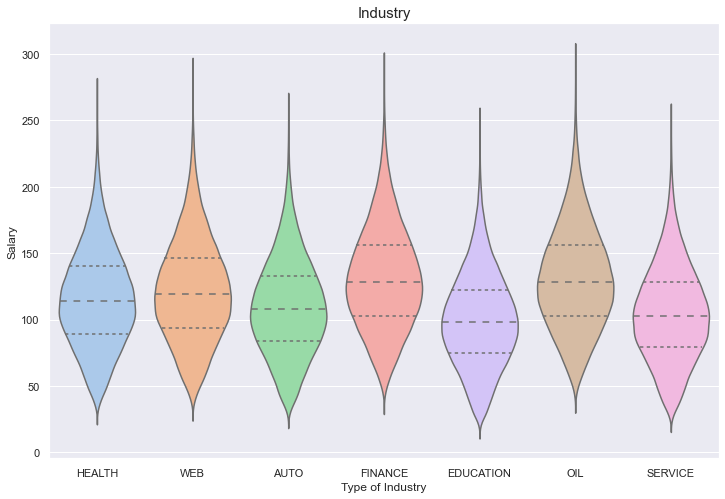

In [38]:
# industry (violin plot)
fig, ax = plt.subplots(figsize = (12, 8))
sns.violinplot(x = cleaned_df_train['industry'], y = cleaned_df_train['salary'], data = cleaned_df_train, 
               scale = 'count', inner = 'quartile')
ax.set_title("Industry", fontsize = 15)
ax.set_xlabel("Type of Industry")
ax.set_ylabel("Salary");

### 3.7 Feature Engineering

#### Removing Categorical Features

The `companyId` and `jobId` features are useless for predicting employee salaries because they do not have any influence on salaries and are simply there to organize the data. Therefore, these 2 features will be dropped from the training data.

In [39]:
# Drop companyId feature
cleaned_df_train.drop(['companyId'], axis = 1, inplace = True)

# Drop jobID feature
cleaned_df_train.drop(['jobId'], axis = 1, inplace = True)

# View updated dataframe
cleaned_df_train.head(10)

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,CFO,NONE,NONE,HEALTH,23,24,178
7,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


#### Converting Categorical Data (OneHotEncoding)

Categorical features will be converted to numerical data as dummy variables so that they can be used in the modeling process for salary prediction.

In [40]:
# One-Hot Encoding categorical features in dataframe
cleaned_df_train = pd.get_dummies(cleaned_df_train)

# View one-hot encoded dataframe
cleaned_df_train.head(10)

,yearsExperience,milesFromMetropolis,salary,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,130,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,73,101,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,10,38,137,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,8,17,142,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,8,16,163,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,2,31,113,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,23,24,178,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,9,70,73,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8,1,54,31,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
9,17,68,104,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### 3.8 Correlation Analysis

**Correlation of all features between each other via heatmap**

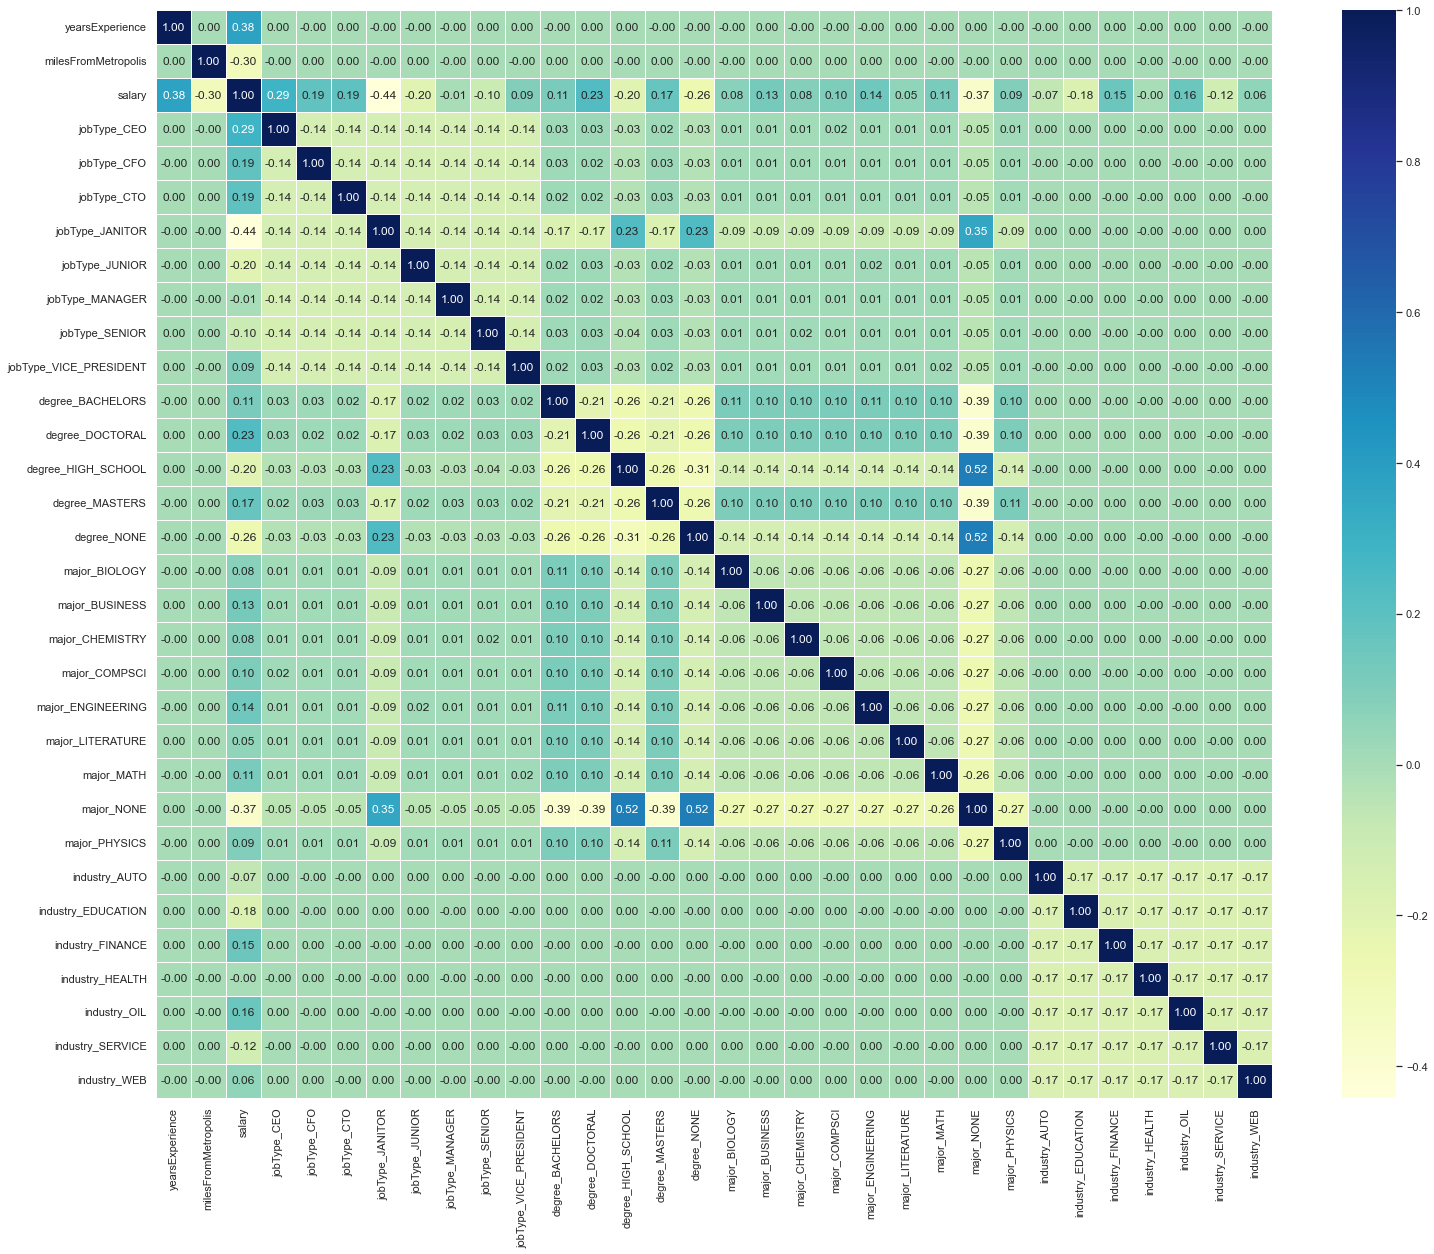

In [41]:
# Heatmap Matrix
corr_matrix = cleaned_df_train.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

**Conclusions from Correlation Analysis:** No multicolinearity is present amongst the features (predictor variables), so none of the features will be dropped when conducting the modeling. Moreover, the `yearsExperience` feature has the highest correlation with salary followed by `jobType`feature. This makes sense because an employee's salary is highly dependent upon their experience, and the field they work in. 

## 4. Data Preprocessing

### 4.1 Defining the Features and Target

In [42]:
# View the dataframe again
cleaned_df_train.head(5)

,yearsExperience,milesFromMetropolis,salary,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,130,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,73,101,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,10,38,137,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,8,17,142,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,8,16,163,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [43]:
# Split the data into X (features) and y (target)
X = cleaned_df_train.drop('salary', axis = 1)

y = cleaned_df_train['salary']

In [44]:
# X - Independent variables (features) 
X.head(5)

,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,73,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,10,38,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,8,17,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,16,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [45]:
# y - Dependent variables (target)
y.head(5)

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

### 4.2 Training and Test Split

We will be leveraging a an **80/20 train-test split** where 80% of the data will be used to train the prediction models, and 20% of the data will be used to test the prediction models.

In [46]:
# Set random seed for consistency and reproducibility
np.random.seed(42)

# Split data into train & sets
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

# Sizes of test & training sets
# Sizes of test & training sets
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is: ", y_test.shape)

The shape of X_train is: (799996, 31)
The shape of X_test is:  (199999, 31)
The shape of y_train is: (799996,)
The shape of y_test is:  (199999,)


## 5. Modeling

### 5.1 Building an Evaluation Function
Evaluating the performance of the regression models will be done through computing their respective **MSE (Mean Square Error)** and **R^2** values. 

In [47]:
# Model evaluation (metrics) function for training data
def show_train_scores(model):
    """
    Given a model that is fitted to training data,
    the function will output the respective model's 
    MSE and R^2 values.
    """
    train_preds = model.predict(X_train)
    scores = {"R^2 of Training Data": model.score(X_train, y_train),
              "MSE of Training Data": mean_squared_error(y_train, train_preds)}
    return scores

# Model evaluation (metrics) function for testing data
def show_test_scores(model):
    """
    Given a model that is fitted to testing data,
    the function will output the respective model's 
    MSE and R^2 values.
    """
    test_preds = model.predict(X_test)
    scores = {"R^2 of Test Data": model.score(X_test, y_test),
              "MSE of Test Data": mean_squared_error(y_test, test_preds)}
    return scores

### 5.2 Baseline Model
Now, that the data has been prepared for modelling, we can start to fit the models. 

We will be using **Linear Regression** - `LinearRegression()` as our baseline model and evaluate performance via **R^2** and **MSE** - `mean_squared_error()` values. 

Ideally, we will be aiming for an **MSE value under 380** and an **R^2 score around 80%** through building and improving upon the baseline model.

#### Building the baseline model with 80% the training data


In [48]:
# Instantiate LinearRegression() model
lm = LinearRegression()

In [49]:
# Fit model on training data
lm.fit(X_train, y_train)

LinearRegression()

In [50]:
# Model scores
show_train_scores(lm)

{'R^2 of Training Data': 0.743714310093923,
 'MSE of Training Data': 384.6575438629946}

In [51]:
# 5-fold cross-validated MSE of baseline model with training data
cv_mse = abs(np.mean(cross_val_score(lm,
                                     X_train,
                                     y_train,
                                     cv = 5,
                                     scoring = "neg_mean_squared_error")))
cv_mse

384.68564273143545

In [52]:
# Storing predictions as a variable
yhat = lm.predict(X_train)

# Dataframe of predictions and actual y values
pred_actual = pd.DataFrame({"yhat": yhat,
                            "y_train": y_train})

# View dataframe to compare yhat vs. predictions
pred_actual.head(10)

,yhat,y_train
784384,122.062317,156
851090,157.130859,180
90030,139.070801,136
962500,147.364944,145
657609,149.606262,159
415783,130.900986,159
645137,153.311539,145
699506,102.854279,94
497384,140.707687,190
854207,65.502762,74


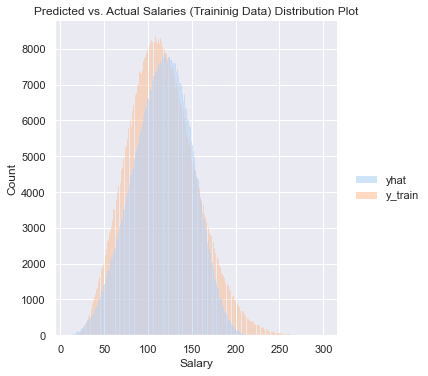

In [53]:
# Distribution plot of predictions vs. actual values (training data)
sns.displot(data = pred_actual).set(title = 'Predicted vs. Actual Salaries (Traininig Data) Distribution Plot', 
                                    xlabel = 'Salary');

#### Testing the baseline model with the 20% test data

In [54]:
# Obtain predictions with test data
test_yhat = lm.predict(X_test)

# Model scores with testing data
show_test_scores(lm)

{'R^2 of Test Data': 0.7430236382523754,
 'MSE of Test Data': 383.28264808418527}

The MSE and accuracy of the training and test data are pretty much the same. We will try to reduce the MSE as much as possible through improving the baseline model. 

In [55]:
# 5-fold cross-validated MSE of baseline model with training data
cv_mse = abs(np.mean(cross_val_score(lm,
                                     X_test,
                                     y_test,
                                     cv = 5,
                                     scoring = "neg_mean_squared_error")))
cv_mse

383.3485452122951

In [56]:
# Dataframe of predictions and actual y values
test_pred_actual = pd.DataFrame({"yhat": test_yhat,
                                 "y_test": y_test})

# View dataframe to compare yhat vs. predictions
test_pred_actual.head(10)

,yhat,y_test
58414,81.073944,80
902618,112.917984,124
778824,43.935974,54
187593,79.666412,80
574438,121.068832,89
13143,78.200897,88
840897,48.806976,48
433048,111.815872,119
413530,131.901245,146
204134,152.203613,180


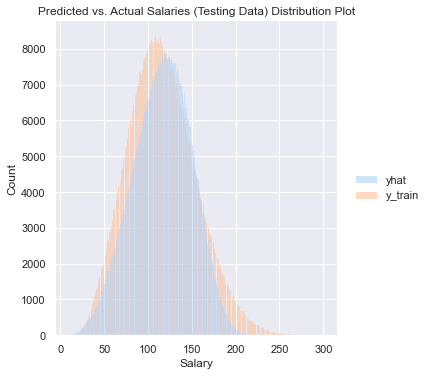

In [57]:
# Distribution plot of predictions vs. actual values (testing data)
sns.displot(data = pred_actual).set(title = 'Predicted vs. Actual Salaries (Testing Data) Distribution Plot', 
                                    xlabel = 'Salary');

**Summary of Baseline Model performance:** 
* Predictions and MSE of training (**MSE ~383**) and testing data (**MSE ~385**) are **very similar**. 
* The **MSE** can be **reduced** while simultaneously **improving R^2** through building upon the baseline model by implementing **more regression algorithms** and tuning their **hyperparameters**.
* Furthermore, the data can be **standardized** to account for the difference in scale between the features.

### 5.3 Improving Baseline Model

 In order to improve the baseline model, the following 4 algorithms will be implemented:
1. Lasso Regression - `Lasso()`
2. Elastic Net Regression - `ElasticNet()`
3. Ridge Regression - `Ridge()`
4. Random Forest Regressor - `RandomForestRegressor()`

#### 1. Lasso Regression

In [58]:
# Instantiate Lasso() model
lasso = Lasso()

# Fit model on training data
lasso.fit(X_train, y_train)

# Model scores on training data
print(show_train_scores(lasso))

# Model scores testing data
print(show_test_scores(lasso))

{'R^2 of Training Data': 0.6690813058773417, 'MSE of Training Data': 496.6737399431876}
{'R^2 of Test Data': 0.668335432375947, 'MSE of Test Data': 494.6808060092651}


The lasso regression model provided far worse predictions with an **increase** in **MSE** by over **$100**, and a significant decrease in prediction accuracy by about **8%** for both the training and test data. We will drop this model and try Elastic Net Regression.

#### 2. Elastic Net Regression

In [59]:
# Instantiate ElasticNet() model
elastic_net = ElasticNet()

# Fit model on training data
elastic_net.fit(X_train, y_train)

# Model scores on training data
print(show_train_scores(elastic_net))

# Model scores on testing data
print(show_test_scores(elastic_net))

{'R^2 of Training Data': 0.449965252650411, 'MSE of Training Data': 825.5436151442292}
{'R^2 of Test Data': 0.4491129377775692, 'MSE of Test Data': 821.653207975976}


The elastic net regression model provided terrible predictions with an **increase** in **MSE** by over **$400**, and a very low prediction accuracy of about 45% for both the training and test data.

#### 3. Ridge Regression

In [60]:
# Instantiate Ridge() model
ridge = Ridge()

# Fit model on training data
ridge.fit(X_train, y_train)

# Model scores on training data
print(show_train_scores(ridge))

# Model scores on testing data
print(show_test_scores(ridge))

{'R^2 of Training Data': 0.7437143107142592, 'MSE of Training Data': 384.6575429319361}
{'R^2 of Test Data': 0.7430236575298976, 'MSE of Test Data': 383.2826193315806}


The Ridge Regression model provided very **identical results** to the Linear Model for both the training and testing data. We will try to improve upon this with Random Forest.

#### 4. Random Forest Regressor

In [61]:
# Instantiate RandomForestRegressor() model with max_samples = 10000
rf = RandomForestRegressor(n_jobs = -1,
                           max_samples = 100000)

# Fit model on training data
rf.fit(X_train, y_train)

# Model scores on training data
print(show_train_scores(rf))

# Model scores on testing data
print(show_test_scores(rf))

{'R^2 of Training Data': 0.8053109050678836, 'MSE of Training Data': 292.2076105807636}
{'R^2 of Test Data': 0.752049099983137, 'MSE of Test Data': 369.82108746116546}


We have achieved an **MSE under 300** with the Random Forest Regressor model on the training data, and achieved the goal of an **MSE under 380** with the test data. Let's try and get the most out of the Random Forest algorithm through implementing hyperparameter tuning. 

## 6. Hyperparameter Tuning and Cross-Validation

We will perform hyperparameter tuning in the `RandomForestRegressor()` model with RandomizedSearchCV to further improve MSE. 

In [86]:
# A grid of random forest hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 1000),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [100000]}

# Setup randomized hyperparameter search for RandomForestRegressor()
rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions = rf_grid,
                              n_iter = 20,
                              cv = 5,
                              verbose = True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [100000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10])},
                   verbose=True)

In [87]:
# Best hyperparameters from the RandomizedSearch
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 14,
 'min_samples_leaf': 9,
 'max_samples': 100000,
 'max_features': 0.5,
 'max_depth': None}

In [88]:
# Evaluate the RandomizedSearch Model on test and train data
print(show_train_scores(rs_model))
print(show_test_scores(rs_model))

{'R^2 of Training Data': 0.7595789418468682, 'MSE of Training Data': 360.84642008696477}
{'R^2 of Test Data': 0.7494840952366761, 'MSE of Test Data': 373.6468160413588}


Hyperparameter tuning with `RandomizedSearchCV` with the provided hyperparameters resulted in a **higher MSE** and **lower R^2** value than the baseline Random Forest model. 

The best predictions were given by the baseline Random Forest with **MSE score of 369** and an **R^2 of 75%** on testing data, and **MSE score of 292** and an **R^2 of 81%** . 

## 7. Data Standardization

To counter the different scales of the features (example: `milesFroMetropolis` and `jobType_CFO`), **feature scaling** is required.

### 7.1 Standardize Features

In [62]:
# Standardize features (independent variables)
scale = StandardScaler()
standard_X = scale.fit_transform(X)
standard_X

array([[-0.27624796,  1.159047  , -0.37758187, ..., -0.4081042 ,
        -0.40788576, -0.40882919],
       [-1.24680052,  0.81275912,  2.64843222, ..., -0.4081042 ,
        -0.40788576,  2.4460093 ],
       [-0.27624796, -0.39924849, -0.37758187, ..., -0.4081042 ,
        -0.40788576, -0.40882919],
       ...,
       [ 0.55565425,  1.08978943, -0.37758187, ..., -0.4081042 ,
        -0.40788576, -0.40882919],
       [-0.83084942, -1.54199851, -0.37758187, ..., -0.4081042 ,
        -0.40788576, -0.40882919],
       [ 1.11025571, -1.33422578, -0.37758187, ..., -0.4081042 ,
        -0.40788576, -0.40882919]])

### 7.2 Train/Test Split with Standardized Features

In [63]:
# Re-setup training and test set with standardized features
np.random.seed(42)

# Split data into train & sets
standard_X_train, standard_X_test, standard_y_train, standard_y_test = train_test_split(standard_X, # independent variables
                                                                                        y, # dependent variable
                                                                                        test_size = 0.2) # percentage of data to use for test set

# Sizes of test & training sets
# Sizes of test & training sets
print("The shape of standard_X_train is:", standard_X_train.shape)
print("The shape of standard_X_test is: ", standard_X_test.shape)
print("The shape of standard_y_train is:", standard_y_train.shape)
print("The shape of standard_y_test is: ", standard_y_test.shape)

The shape of standard_X_train is: (799996, 31)
The shape of standard_X_test is:  (199999, 31)
The shape of standard_y_train is: (799996,)
The shape of standard_y_test is:  (199999,)


### 7.3 Linear Regression Model with Standardized Data

In [64]:
# Fit model on training data
lm.fit(standard_X_train, standard_y_train)

# Make predictions with training and testing data
standard_yhat_train = lm.predict(standard_X_train)
standard_yhat_test = lm.predict(standard_X_test)

# Model scores with training and testing data
print("R^2 of Linear Model with Standardized Training Data: " + str(rf.score(standard_X_train, standard_y_train)))
print("MSE of Linear Model with Standardized Training Data: " + str(mean_squared_error(standard_y_train, standard_yhat_train)))
print("R^2 of Linear Model with Standardized Testing Data: " + str(rf.score(standard_X_test, standard_y_test)))
print("MSE of Linear Model with Standardized Testing Data: " + str(mean_squared_error(standard_y_test, standard_yhat_test)))

R^2 of Linear Model with Standardized Training Data: 0.40735200743450617
MSE of Linear Model with Standardized Training Data: 384.6582366905636
R^2 of Linear Model with Standardized Testing Data: 0.40409722609384546
MSE of Linear Model with Standardized Testing Data: 383.27773660839387


### 7.4 Random Forest Model with Standardized Data

In [69]:
# Fit model on training data
rf.fit(standard_X_train, standard_y_train)

# Make predictions with training and testing data
standard_yhat_rf_train = rf.predict(standard_X_train)
standard_yhat_rf_test = rf.predict(standard_X_test)

# Model scores with training and testing data
print("R^2 of Random Forest Model with Standardized Training Data: " + str(lm.score(standard_X_train, standard_y_train)))
print("MSE of Random Forest Model with Standardized Training Data: " + str(mean_squared_error(standard_y_train, 
                                                                                              standard_yhat_rf_train)))
print("R^2 of Random Forest Model with Standardized Testing Data: " + str(lm.score(standard_X_test, standard_y_test)))
print("MSE of Random Forest Model with Standardized Testing Data: " + str(mean_squared_error(standard_y_test, 
                                                                                             standard_yhat_rf_test)))

R^2 of Random Forest Model with Standardized Training Data: 0.743713848483864
MSE of Random Forest Model with Standardized Training Data: 292.21367343962845
R^2 of Random Forest Model with Standardized Testing Data: 0.7430269312091163
MSE of Random Forest Model with Standardized Testing Data: 369.7394709703463


Standardized the data had **no effect on the MSE score** of both the Linear and Ramdom Forest models. However, the R^2 of the linear model was **significantly worse** and dropped to **~0.4**. This was a steep drop of about **~0.35** from the non-standardized data predictions. 

Since, the MSE was not effected, it is safe to conclude that the best performing model was the baseline Random Forest model with `max_samples` = 1000 and `n_jobs` = -1 with the non-standardized data. The **MSE** scores for this model were **292** on the training data and **369** on the testing data with R^2 values of ~0.8 and ~0.75 for the training and test data respectively. 

## 8. Deploy and Automate with a Pipeline

To deploy the Random Forest model, we will create a pipeline that automates the standardizationn process for the provided data so that it is ready to be provided as input for the model. 

### 8.1 Create Pipeline

In [65]:
# Pipeline for Random Forest Regression
input = [('scale', StandardScaler()), ('model', RandomForestRegressor(n_jobs = -1, max_samples = 100000))]
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_samples=100000, n_jobs=-1))])

### 8.2 Implement Pipeline with Training Data

In [66]:
# Fitting pipeline to non-split training data
rf_model_pipe = pipe.fit(X, y)

In [67]:
# Make predictions with pipeline
yhat_pipe = pipe.predict(X)

# View predictions
yhat_pipe

array([127.        , 119.43166667, 146.56      , ...,  63.00666667,
       128.56166667, 107.17      ])

### 8.3 Save Model

In [68]:
from joblib import dump

# Save model to file
dump(rf_model_pipe, filename = "rf_model_salary_prediction.joblib")

['rf_model_salary_prediction.joblib']

### 8.4 Load and Implement Model with Test Data

In [69]:
import joblib

# Load model and assign model to variable
rf_model = joblib.load("rf_model_salary_prediction.joblib")

In [70]:
# Implement model with test data
test_results = rf_model.score(X_test, y_test)
test_results

0.796451978039513

## 9. Model Predictions on Test Data (unknown salaries)

### 9.1 Data Preprocessing

In [71]:
# Assign test data to new name
test_df = test_feat_df

# View test data (features with salaries)
test_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [72]:
# Drop irrelevant features that do not influence salary prediction
test_df.drop('jobId', axis = 1, inplace = True)
test_df.drop('companyId', axis = 1, inplace = True)

# View updated test data
test_df.head(5)

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [73]:
# Check for missing values
test_df.isnull().sum()

jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [74]:
# One-Hot Encoding categorical features in dataframe
test_df = pd.get_dummies(test_df)

# View one-hot encoded dataframe
test_df.head(10)

# Cleaned test data size
print(test_df.shape)

(1000000, 31)


### 9.2 Making Predictions

In [75]:
# Predictions with Random Forest model
predicted_salaries = rf_model.predict(test_df)

# View first 10 predictions
predicted_salaries[:10]

array([109.79      ,  92.14      , 180.98      , 102.135     ,
       113.605     , 151.43333333,  99.065     , 116.66      ,
       104.64      ,  91.47666667])

We do not have any salaries for the employees in the test data, so there is no way of determining the accuracy of the predictions. 

## 10. Feature Importance

Which features contribute most to a model predicting employee salaries?

In [76]:
# Feature importances of Random Forest Regressor
rf.feature_importances_

array([0.19288889, 0.19901567, 0.00973041, 0.00427813, 0.00428954,
       0.19643101, 0.07199864, 0.0266867 , 0.04759794, 0.00982529,
       0.008359  , 0.01089119, 0.00455634, 0.00741117, 0.00631873,
       0.00500385, 0.00644629, 0.00496548, 0.00480285, 0.00739715,
       0.00550983, 0.00517732, 0.05321387, 0.00474619, 0.01346632,
       0.02588806, 0.01327691, 0.00927923, 0.01343827, 0.018288  ,
       0.00882173])

In [77]:
# Match features to columns in a series
feature_importance_s = pd.Series(rf.feature_importances_, index = X.columns)

In [78]:
# Converting series to dataframe
feature_importance_df = feature_importance_s.to_frame('value').T
feature_importance_df

,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
value,0.192889,0.199016,0.00973,0.004278,0.00429,0.196431,0.071999,0.026687,0.047598,0.009825,...,0.005177,0.053214,0.004746,0.013466,0.025888,0.013277,0.009279,0.013438,0.018288,0.008822


In [79]:
# Finding the most importance features
feature_importance_df.sort_values(by = ['value'], axis = 1, ascending = False)

,milesFromMetropolis,jobType_JANITOR,yearsExperience,jobType_JUNIOR,major_NONE,jobType_SENIOR,jobType_MANAGER,industry_EDUCATION,industry_SERVICE,industry_AUTO,...,degree_NONE,major_LITERATURE,major_MATH,major_BIOLOGY,major_CHEMISTRY,major_COMPSCI,major_PHYSICS,degree_HIGH_SCHOOL,jobType_CTO,jobType_CFO
value,0.199016,0.196431,0.192889,0.071999,0.053214,0.047598,0.026687,0.025888,0.018288,0.013466,...,0.006319,0.00551,0.005177,0.005004,0.004965,0.004803,0.004746,0.004556,0.00429,0.004278


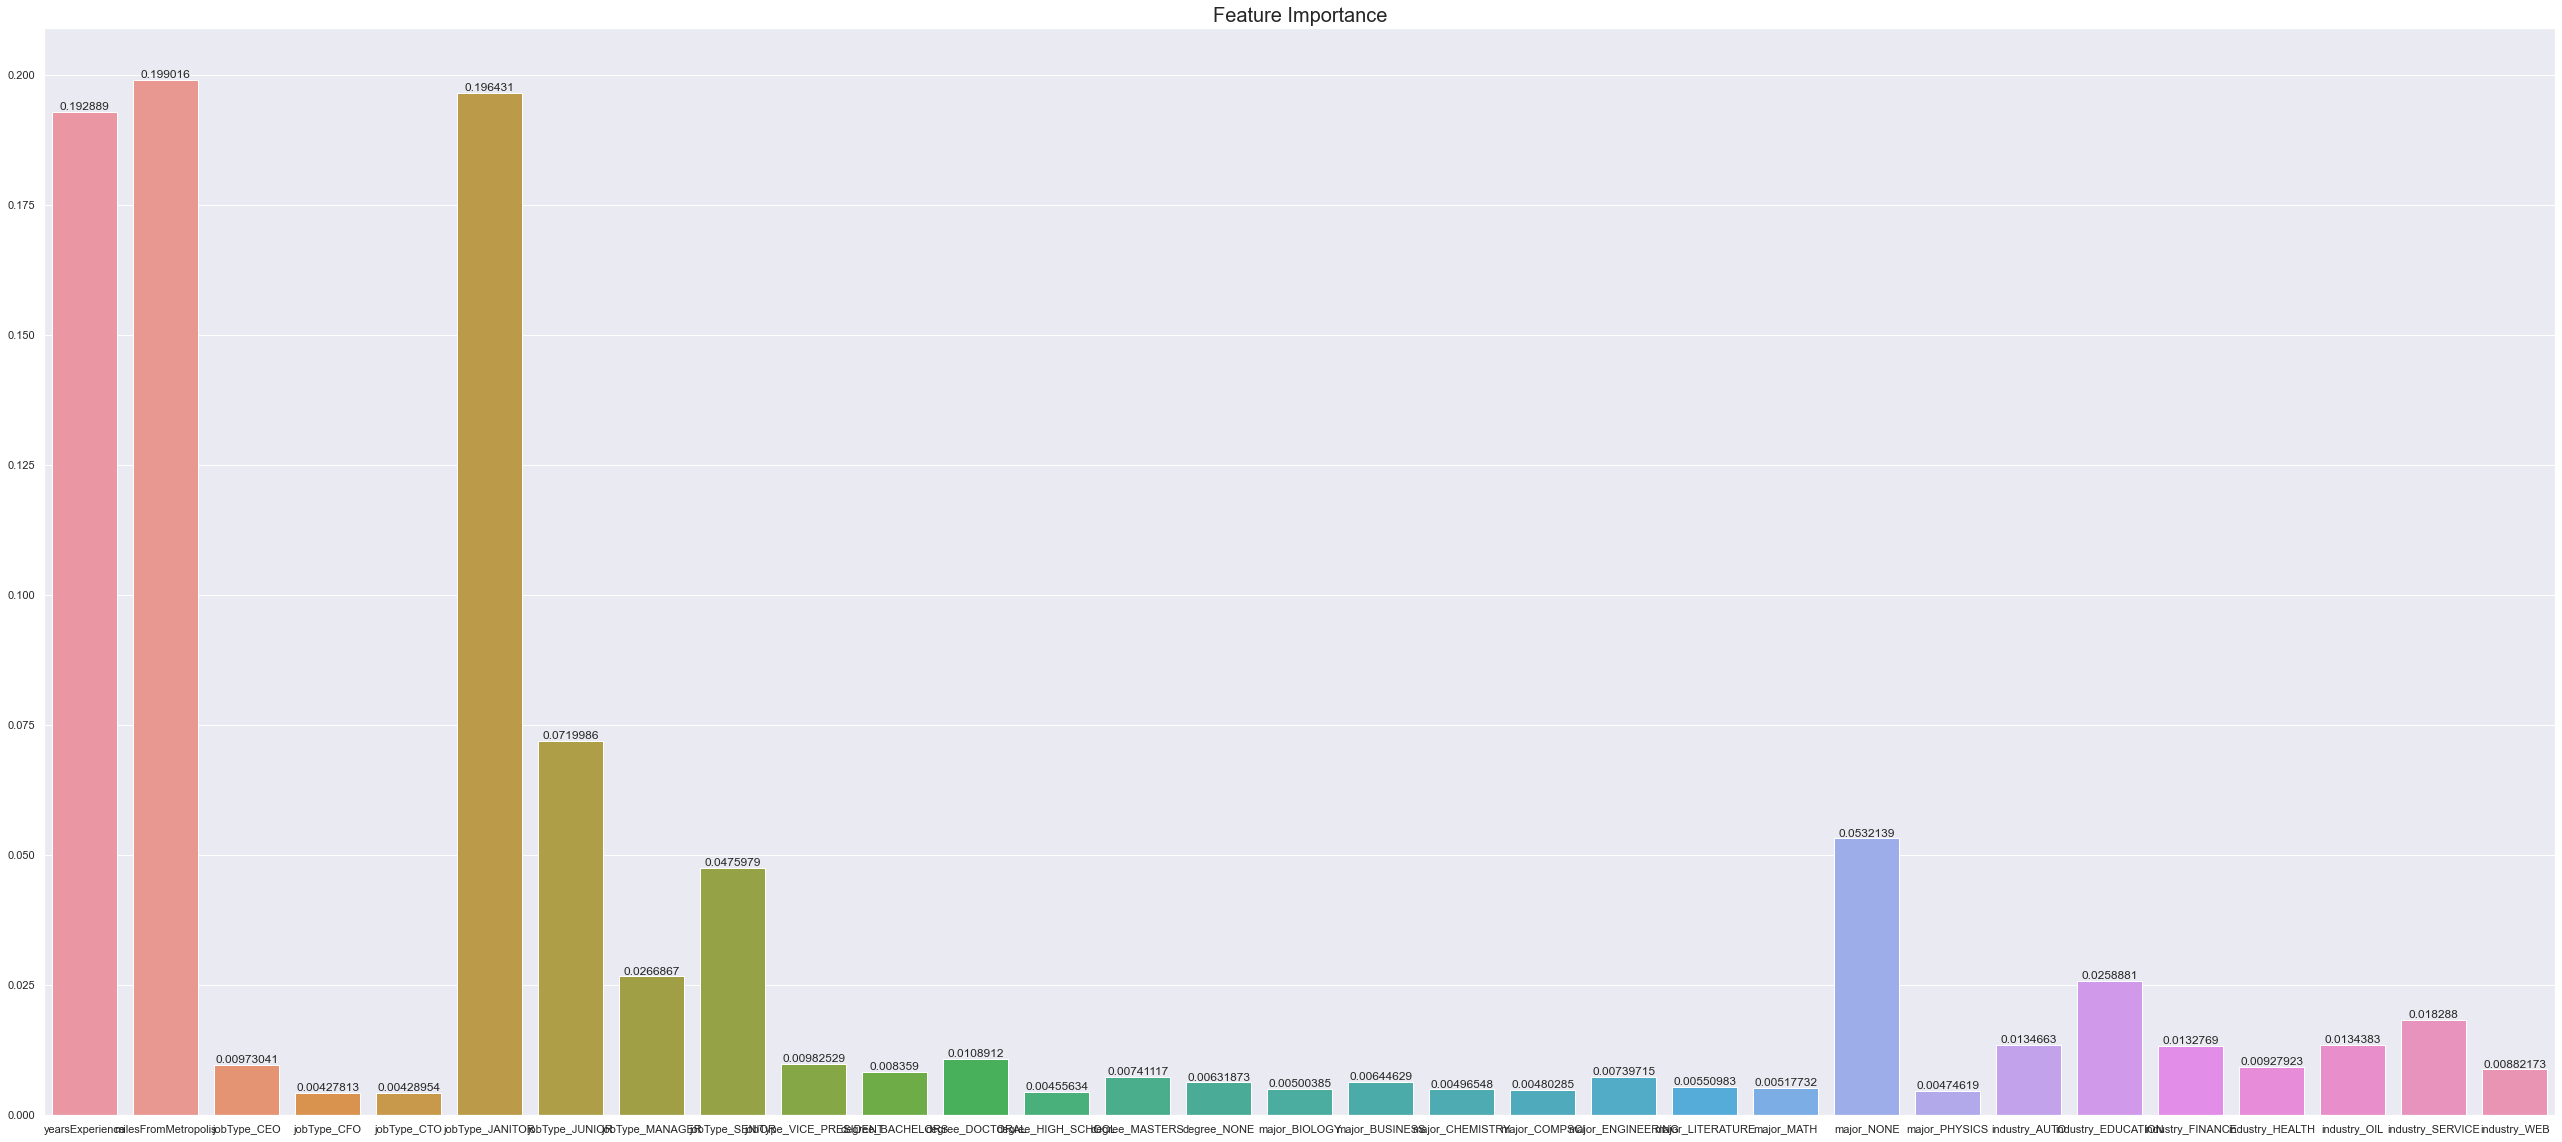

In [80]:
# Visualize feature importance
plt.figure(figsize = (45, 20))
feature_importance_plot = sns.barplot(data = feature_importance_df)
feature_importance_plot.set_title("Feature Importance", fontsize = 20)
feature_importance_plot.bar_label(feature_importance_plot.containers[0]); # Make bar values appear on top of bars

**Conclusions from Feature Importance:**

* `yearsExperience`, `milesFromMetropolis`, and `jobTypeJanitor` are by far the most important features for determining/predicting an employee salaries. This makes sense because salaries are highly dependent upon the experience an employee has as well as the distance they need to travel to get to work. Additonally, janitors earn very low salaries, and an employee being a janitor or not as a big impact on predicting what their potential salary could be.

* The least important features for predicting an employee's salary were the majors obtained by an employee, and if they held a CFO or CTO position. Typically, the major one pursues in school has little influence on salary because employers seek candidates with the right skills and experience. Additionally, employees that hold higher up positions are bound to earn high salaries, but this does not tell us about employees working in advanced fields with higher levels of education and more experience. These employees also have the potential to earn a lot. 

## 11. Conclusion

The **Random Forest** model with `max_samples` = 1000 yielded the most accurate predictios with minimized error. With this model, an **MSE** of **369** and **accuracy** of **75%**.

This model can be used by recruiters to determine an appropriate salary for an employee given their education, experience, industry of interest, and distance from a metropolis. 

## 12. Further Experimentation

According to [Scikit-Learn's algorithm selection suggestions](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), given that we are trying to predict a quantity (salary) and have over 100k samples; the documentation suggests implementing the `SGD Regressor` algorithm. Additionally, we will also try using `Gradient Boosting Regressor` ensemble algorithm to try to reduce MSE. If any of the algorithms have promising results, we will try to tune their hyperparameters.

In [82]:
# Import SGD Regressor from sklearn library
from sklearn.linear_model import SGDRegressor

# Instantiate SGD Regressor algorithm
sgd_reg = SGDRegressor()

In [83]:
# Fit model on training data
sgd_reg.fit(X_train, y_train)

SGDRegressor()

In [84]:
# Model scores on training data
print(show_train_scores(sgd_reg))

# Model scores on testing data
print(show_test_scores(sgd_reg))

{'R^2 of Training Data': -10.970428294006716, 'MSE of Training Data': 17966.33884727693}
{'R^2 of Test Data': -11.03237237885388, 'MSE of Test Data': 17946.39599042714}


The `SGDRegressor` model performed horribly and will not be considered even with hyperparameter tuning because it is computationally expensive and takes a long time to output predictions on an average computer.

In [91]:
# Import Gradient Boosting Regressor from sklearn library
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate Gradient Boosting Regressor algorithm
gbr = GradientBoostingRegressor(n_estimators = 150, max_depth = 5, loss = 'ls', verbose = 0)

In [92]:
# Fit model on training data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=150)

In [93]:
# Model scores on training data
print(show_train_scores(gbr))

# Model scores on testing data
print(show_test_scores(gbr))

{'R^2 of Training Data': 0.7633208483830018, 'MSE of Training Data': 355.2302166302617}
{'R^2 of Test Data': 0.7614268718079544, 'MSE of Test Data': 355.8340530362819}


Aha! We have achieved an even lower **MSE score of 355 (MSE <360)** for both the training and testing data with the Gradient Boosting Regressor model. This model provides better predictions than all other models used in this analysis and employers can employ this model for employee salary prediction over the finalized Random Forest model that was built earlier. 

Extensive hyperparameter tuninng can be done with the ensemble techniques provided a sufficient grid sizes that cover a range of hyperparameter values, but this would be too computationally expensive and take too much time for the average computer to handle. One solution could be to train the models in batches given that the dataset contains 1000000 sample, but given the goal of getting an MSE under 380, we have done quite well with the salary predictions. 